In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1363/HousePrice.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 初识数据

在数据集中 GrLivArea 表示占地面积，现在来看一下房子占地面积与房价的关系，这里通过画图来直观的判断。

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

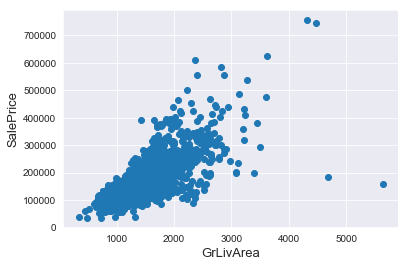

In [4]:
train_drop = train.drop(
    train[(train['GrLivArea'] > 4000) & (train['SalePrice'] <300000)].index)
fig, ax =plt.subplots()
ax.scatter(x=train["GrLivArea"], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

从图显示的结果可以看出，占地面积与房价大致呈线性相关关系。也就是说，面积越大，房价越高。此外，细心观察可以发现，上图中右下角有两个数据点有点不正常，通常将这类点称之为异常值点。现在将其删除。

(-0.5, 9.5, 0, 800000)

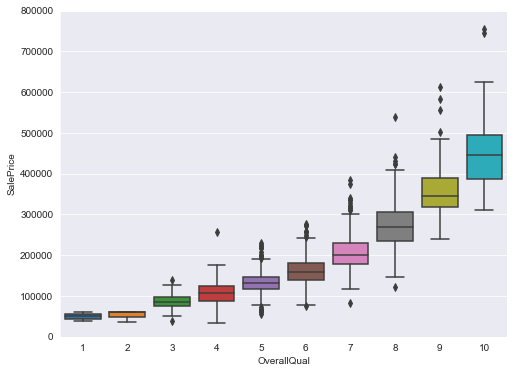

In [5]:
var = 'OverallQual'
data = pd.concat([train_drop['SalePrice'], train_drop[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

从上图中可以看出， OverallQual 的等级越高，也就是房子的材料和质量越好，房价越高。
上面分析了单个特征与房价的关系，现在可以通过热图来分析所有特征之间的相关性以及与房价的关系。这里为了便于查看只取了前 10 个相关度最高的特征。

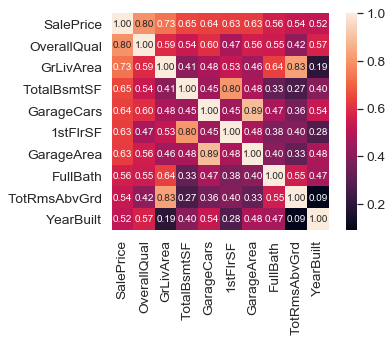

In [6]:
import numpy as np

k= 10
corrmat = train_drop.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_drop[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
    'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

从上面结果可以看到，房价大致与占地面积和房子质量相关度最高，这也很符合事实。下面画出这些特征之间的关系。

# 数据预处理


#上面只是使用可视化的方法来初步查看数据，让我们先对数据有一个初步的认识。现在来对数据进行简单的预处理。在前面的数据预览时，可以看出第一列为 ID ，也就是说该列对房价没有影响，因此这里先把该列删除。删除之后的列数为 80 列。
##去掉没有影响的数据列

In [8]:
train_drop1 = train_drop.drop("Id", axis=1)
train_drop1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_drop1['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

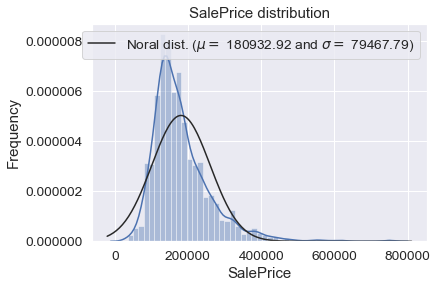

In [13]:
from scipy.stats import norm, skew
sns.distplot(train_drop1['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_drop1['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Noral dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

可以看到，该数据集貌似不是常见的正态分布，即高斯分布。现在画出其  Q-Q 图

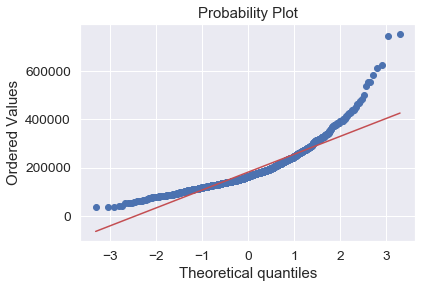

In [15]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(train_drop1['SalePrice'], plot=plt)
plt.show()

一般预测模型都会选用机器学习算法，而许多机器学习算法都是基于数据是高斯分布的条件下推导出来的，因此，这里先把房价处理成为高斯分布的形式。这里直接使用 NumPy 提供的数据平滑接口来实现。


 mu = 12.02 and sigma = 0.40



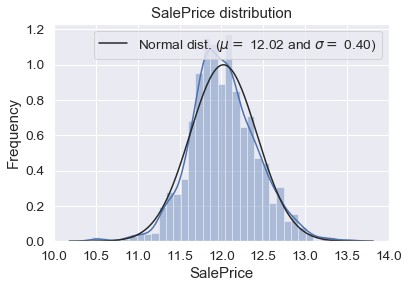

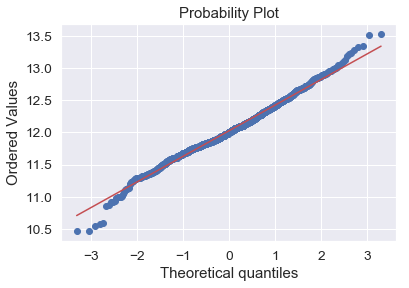

In [16]:
train_drop1['SalePrice'] = np.log1p(train_drop1['SalePrice'])
sns.distplot(train_drop1['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_drop1['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_drop1['SalePrice'], plot=plt)
plt.show()

经过平滑之后，数据已经大致呈高斯分布的形状。

# 特征工程

因为数据集可能会含有一些缺失值，为了便于观察，可以求出其缺失率。

In [19]:
train_drop1.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [23]:
train_na = (train_drop1.isnull().sum()/len(train)) *100
train_na = train_na.drop(
train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratia': train_na})
missing_data.head(20)

,Missing Ratia
PoolQC,99.452055
MiscFeature,96.164384
Alley,93.630137
Fence,80.616438
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


在数据集中 PoolQC 列的数据缺失达到 99.45% ，MiscFeature 列的数据缺失达到 96.16%。为了更加直观的观察，对其进行可视

Text(0.5, 1.0, 'Percent missing data by feature')

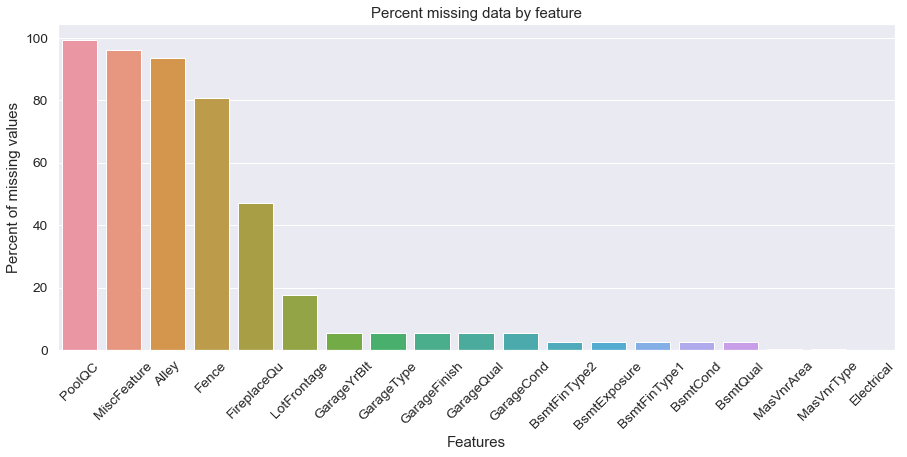

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='45')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

从上面的分析中，我们可以看到，大约有 20 列的数据都存在缺失值，在构建预测模型之前需要对其进行填充。
在数据描述中，PoolQC 表示游泳池的质量，缺失了则代表没有游泳池。从上面的分析结果，该列的缺失值最多，这也就意味着许多房子都是没有游泳池的，与事实也比较相符。
除了 PoolQC 列，还有很多情况类似的列，例如房子贴砖的类型等。因此，
**对这些类别特征的列都填充 None。

In [27]:
feature = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
           'FireplaceQu', 'GarageType', 'GarageFinish',
           'GarageQual', 'GarageCond', 'BsmtQual',
           'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in feature:
    train_drop1[col] = train_drop1[col].fillna('None')

对这些类似于车库的面积和地下室面积相关数值型特征的列填充 0 ，表示没有车库和地下室

In [30]:
feature = ['GarageYrBlt', 'GarageArea', 'GarageCars',
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
           'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           'MasVnrArea', 'Electrical']
for col in feature:
    train_drop1[col] = train_drop1[col].fillna(0)

LotFrontage 表示与街道的距离，每个房子到街道的距离可能会很相似，因此这里采用附近房子到街道距离的**中值来进行填充。
**为什么不用平均值

In [31]:
train_drop1["LotFrontage"] = train_drop1.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

MSZoning 表示分区分类，这里使用众数来填充。

In [33]:
feature =[]
train_drop1['MSZoning'] = train_drop1['MSZoning'].fillna(
    train_drop1['MSZoning'].mode()[0])

Utilities 列与所要预测的 SalePrice 列不怎么相关，这里直接删除该列

In [34]:
train_drop2 = train_drop1.drop(['Utilities'], axis=1)


Functional 表示功能，数据描述里说缺失值代表房子具有基本的功能。因此对其进行常值填充。

In [37]:
train_drop2["Functional"] = train_drop1["Functional"].fillna('Typ')

In [38]:
train_drop2.isnull().sum().sort_values(ascending=False)[:20]

SalePrice       0
BsmtQual        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtCond        0
RoofStyle       0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
RoofMatl        0
YearRemodAdd    0
dtype: int64

进过数据填充之后，已经没有了缺失值。
在数据集中，特征主要分为两种，分别是数值型特征和类别型特征。数值型特征就是连续数值组成的特征，例如房子的面积；而类别型特征则是由两类或两类以上类别组成的特征，例如房子是否带游泳池，即包含是和否两个类别。
在数据集中有一些特征属于类别型特征，但却用数值来表示，例如销售月份。因此，要转换其成为类别型特征。

In [40]:
feature = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for col in feature:
    train_drop2[col] = train_drop2[col].apply(str)

对一些类别型的特征列进行编码。将其转换成为用数值来表示的类别型特征。

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold']
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_drop2[c].values))
    train_drop2[c] = lbl.transform(list(train_drop2[c].values))
train_drop2[cols].head()    

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,9,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,4,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,10,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,3


因为数据没有给出房子的总面积，也就是说没有统计出一楼、二楼以及地下室的总面积。不过我们可以通过数据集来手动提取这一特征。

In [45]:
train_drop2['TotalSF'] = train_drop2['TotalBsmtSF'] + train_drop2['1stFlrSF'] + train_drop2['2ndFlrSF']

在前文分析房子价格 SalePrice 时，由于其不服从正态分布，因此使用平滑的方法让其服从正态分布。这里这对数据集中的数值特征列进行同样的分析。先通过 SciPy 提供的接口 scipy.stats.skew 来判断其  偏度 。

In [48]:
numeric_feats = train_drop2.dtypes[train_drop2.dtypes != "object"].index
skewed_feats = train_drop2[numeric_feats].apply(
    lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numberical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head()


Skew in numberical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688


从上面的结果可知，列 MiscVal 的偏度最大，偏度越大也就意味着该列的数据分布越偏离高斯分布。

现在通过  BoxCox 方法「矫正」这些特征列。

In [50]:
from scipy.special import boxcox1p
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_drop2[feat] = boxcox1p(train_drop2[feat], lam)

对那些用符号表示的类别型特征用 One-Hot 来进行编码。

In [51]:
data_y = train_drop2['SalePrice']
data_x = train_drop2.drop(['SalePrice'], axis=1)

In [53]:
data_X_oh = pd.get_dummies(data_x)
print(data_X_oh.shape)

(1458, 221)


# 预测模型

In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

现在对数据进行划分，选用 70% 的数据来训练，选用 30% 的数据来测试。

In [56]:
data_y_v = data_y.values
data_x_v = data_X_oh.values
length = int(len(data_y)*0.7)
train_y =data_y_v[:length]
train_x = data_x_v[:length]
test_y = data_y_v[length:]
test_x = data_x_v[length:]


构建模型，并进行训练。这里使用的是  Lasso 模型，其是线性回归的一种改进版本

In [58]:
model = Lasso()
model.fit(train_x, train_y)
    

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
y_pred = model.predict(test_x)
mean_squared_error(test_y, y_pred)

0.0018862935394760103

本次实验讲解了房子价格的预测，实验主要从数据分析的角度来讲解，首先对数据进行可视化，然后对数据进行分析，填充缺失值，然后手工提取特征，最后构建预测模型。这一流程通常为数据分析的基本流程。此外，本实验并未对数据分析所使用到的数学方法做详细的介绍，如果你感兴趣可以自行查阅相关的资料。